**CNN Spectrogram Classification using tensorflow**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
This task is done entirely on Colab, so if you need to use it further or debug it,
please change the code about file location.

Main contributor: John.Poole

'''

In [ ]:
!pip install split-folders

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import splitfolders
import torch

In [ ]:
!unzip "/content/drive/MyDrive/Spectrograms_Final.zip" -d "/content"

In [ ]:
!ls "/content/Spectrograms_Final/"

0  1  10  11  2  3  4  5  6  7	8  9


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 70% as the training dataset, 20% as the validation dataset and 10% as the test dataset.

data_dir = "/content/Spectrograms_Final/"
splitfolders.ratio(data_dir, output="output", seed=123, ratio=(0.7,0.2,0.1)) 

Copying files: 12000 files [00:01, 6970.11 files/s]


In [ ]:
train_dir = "/content/output/train/"
valid_dir = "/content/output/val/"
test_dir = "/content/output/test/"

batch_size = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  shuffle=True,
  batch_size=batch_size)

Found 8400 files belonging to 12 classes.


In [ ]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  valid_dir,
  seed=123,
  shuffle=True,
  batch_size=batch_size)

Found 2400 files belonging to 12 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  shuffle=False,
  batch_size=batch_size)

Found 1200 files belonging to 12 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
# Understanding the shape of the images and labels 

for images, labels in train_ds:
  print(images.shape)
  print(labels.shape)
  break

(32, 256, 256, 3)
(32,)


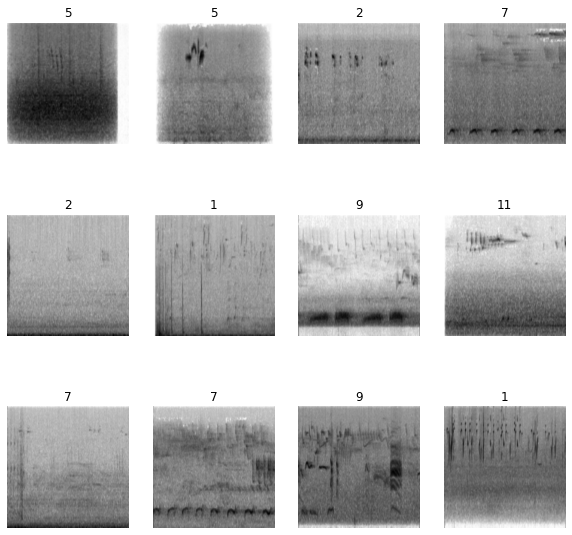

In [ ]:
# Viewing the spectrogram images 

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# CNN architecture

num_classes = 12
height = 256 
width = 256
n_channels = 3

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(height, width, n_channels))),
model.add(tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

In [ ]:
# Compiling model 

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [ ]:
# Training model and evaluating fit using validation set

model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
263/263 [==============================] - 27s 98ms/step - loss: 2.1896 - accuracy: 0.2623 - val_loss: 1.7149 - val_accuracy: 0.4613
Epoch 2/10
263/263 [==============================] - 26s 98ms/step - loss: 1.6379 - accuracy: 0.4643 - val_loss: 1.4931 - val_accuracy: 0.5329
Epoch 3/10
263/263 [==============================] - 26s 98ms/step - loss: 1.3910 - accuracy: 0.5513 - val_loss: 1.3695 - val_accuracy: 0.5738
Epoch 4/10
263/263 [==============================] - 26s 98ms/step - loss: 1.1273 - accuracy: 0.6369 - val_loss: 1.2661 - val_accuracy: 0.6075
Epoch 5/10
263/263 [==============================] - 26s 98ms/step - loss: 0.9017 - accuracy: 0.7095 - val_loss: 1.3411 - val_accuracy: 0.6296
Epoch 6/10
263/263 [==============================] - 26s 98ms/step - loss: 0.6975 - accuracy: 0.7752 - val_loss: 1.4621 - val_accuracy: 0.6308
Epoch 7/10
263/263 [==============================] - 26s 99ms/step - loss: 0.5384 - accuracy: 0.8226 - val_loss: 1.5886 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
# Evaluating model on test data 

model.evaluate(test_ds)

38/38 [==============================] - 2s 51ms/step - loss: 1.6257 - accuracy: 0.6442


[1.62570321559906, 0.6441666483879089]